# Определение закономерностей успешной игры

# Описание проекта

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


# Описание данных 

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Импортирование библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
# импортируем нужные библиотеки

## Изучение общей информации

In [ ]:
games = pd.read_csv('/datasets/games.csv')
# открываем файл

In [ ]:
games.head(20)
# посмотрим на таблицу

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
games.info()
# посмотрим информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
games.describe()
# посмотрим на статистику

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод:
После первоначального просмотра данных видим, мы имеем дело с 11-ью столбцами данных. В некоторых из них есть пропущенные значения. 

## Предобработка данных

In [ ]:
games.columns = games.columns.str.lower()
# преобразовали столбцы в нижний регистр

In [ ]:
games.head()
# проверим результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
games[games['name'].isna()].head()
# посмотрим на пропуски в столбце name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строк всего 2, пропуски в **name** и **genre** совпадают, да и большинства информации для исследования нет. Можем удалить данные, это не нанесет вреда в нашей работе.

In [ ]:
games = games.dropna(subset = ['name'])

Столбец **year_of_release**. В этом столбце есть пропуски. Плюс неправильный формат float. Взвесив все за и против, принял решение заполнить пропуски значением 2050, это дата будет обозначать отсутствие даты релиза. Преобразовывать в формат даты не будем, оставим тип int, так как нам нужен только год.

In [ ]:
games['year_of_release'] = games['year_of_release'].fillna(2050)
games['year_of_release'] = games['year_of_release'].astype('int')
# заполнили пропуски и преобразовали в тип int

In [ ]:
games.info()
# проверим результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
games['user_score'].unique()
# посмотрим на уникальные значения user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
games[games['user_score'] == 'tbd']['user_score'].count()
# посчитаем количество значений tbd

2424

Значение "tbd" встречается 2424 раза. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Заменим данные значения на NaN

In [ ]:
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan
# замена значений

In [ ]:
games['user_score'] = games['user_score'].astype('float')
# перевод в тип float

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
games['rating'].unique()
# уникальный значения rating

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце есть пропуски. Аббревиатура «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Заменим пропуски на значение "RP".

In [ ]:
games['rating'] = games['rating'].fillna('RP')
# замена пропусков 

In [ ]:
games['rating'].value_counts()
# проверка результата

RP      6767
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Пропуски в **critic_score** и **user_score** оставим. Так как не все игры имеют оценки как критиков, так и пользователей.

In [ ]:
games.duplicated().sum()
# проверим на дубликаты

0

In [ ]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
# добавим столбец с суммарными продажами

In [ ]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


### Вывод
Данные готовы к анализу. Было выполнено следующее:

- Название столбцов было приведено к нижнему регистру
- Восстановлены пропуски в строках.
- Удалены строки без нужных данных.
- Добавлен столбец суммарных продаж.

## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [ ]:
games = games.query('year_of_release != 2050')
year_pivot_table = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_pivot_table.columns = ['games_count']
year_pivot_table
# сводная таблица для анализа выпуска игр по годам

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0, 0.5, 'Количество игр')

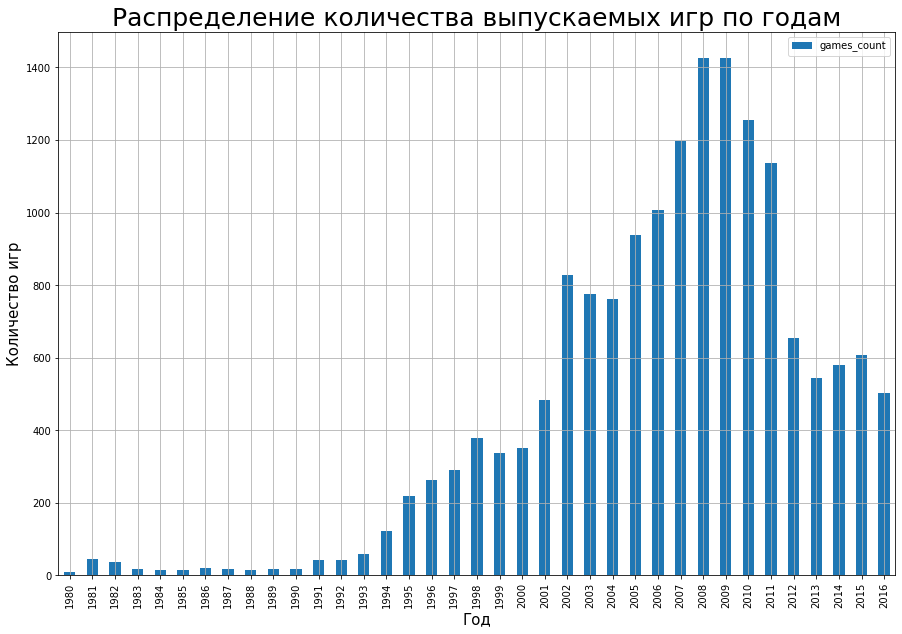

In [ ]:
year_pivot_table.plot(kind='bar', grid='True', figsize=(15,10))
plt.title('Распределение количества выпускаемых игр по годам', fontsize=25)
plt.xlabel('Год', fontsize=15)
plt.ylabel('Количество игр', fontsize=15)
# строим столбчатую диаграмму

**Вывод**

Данные по всем периодам не важны. Больше всего игр было выпущено с 2005 по 2011 года.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
platform_sales_pivot_table = games.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('total_sales', ascending=False)
platform_sales_pivot_table
# сводная таблица для суммарных продаж по платформам

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Возьмем первые 10 платформ и рассмотрим их по годам

In [ ]:
best_platform_sales = list(platform_sales_pivot_table.index[:10])
best_platform_sales

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [ ]:
for platform in best_platform_sales:
    platform_sales_pivot_table = pd.pivot_table(games.query('platform == @platform'), 
                                                index=['platform','year_of_release'], 
                                                values='total_sales', aggfunc='sum')
    display(platform_sales_pivot_table)
    display()
# для каждой платформы из списка строим сводную таблицу по суммарным продажам для каждого года     

total_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45

total_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

total_sales
platform year_of_release             
PS3      2006                   20.96
         2007                   73.19
         2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60

total_sales
platform year_of_release             
Wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18

total_sales
platform year_of_release             
DS       1985                    0.02
         2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
         2009                  119.54
         2010                   85.02
         2011                   26.18
         2012                   11.01
         2013                    1.54

total_sales
platform year_of_release             
PS       1994                    6.03
         1995                   35.96
         1996                   94.70
         1997                  136.17
         1998                  169.49
         1999                  144.53
         2000                   96.37
         2001                   35.59
         2002                    6.67
         2003                    2.07

total_sales
platform year_of_release             
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25

total_sales
platform year_of_release             
GBA      2000                    0.07
         2001                   61.53
         2002                   74.16
         2003                   56.67
         2004                   77.91
         2005                   33.86
         2006                    5.28
         2007                    3.40

total_sales
platform year_of_release             
PSP      2004                    7.06
         2005                   43.84
         2006                   55.32
         2007                   46.93
         2008                   34.55
         2009                   37.78
         2010                   35.04
         2011                   17.82
         2012                    7.69
         2013                    3.14
         2014                    0.24
         2015                    0.12

total_sales
platform year_of_release             
3DS      2011                   63.20
         2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14

**Вывод**

Для популярных платформ срок использования равен 8-12 лет. Возьмем одну из популярных приставок в мире, у которой уже есть 5 поколений и посмотрим на изменение в годах:

* PS 1994-2003
* PS2 2000-2011
* PS3 2006-2016
* PS4 2013-по сегодняшний день

Получается каждые 5-7 лет компания Sony выпускает новую платформу с лучшими техническими параметрами, а игры на предыдущей платформе еще существуют на рынке. Из последних новостей мы знаем, что уже есть PS5, и вышла она в 2020 году.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

Объеденим два вопроса в один. То есть определив актуальный период, соответственно не будем учитывать данные за предыдущие года.

Актуальным периодом будем считать года с 2013 по 2016.

In [ ]:
actual_data_games = games.query('year_of_release > 2012')
actual_data_games.info()
# срез для актуального периода

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [ ]:
actual_data_games.head(10)
# просмотр 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,RP,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


**Вывод**

Получили данные за выбранный актуальный период

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [ ]:
best_platform = actual_data_games.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
best_platform
# посмотрим на каждую платформу в актуальный период

total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [ ]:
best_platform = actual_data_games.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
best_platform.sort_values('total_sales', ascending=False)
# суммарные продажи за актуальный период

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Text(0, 0.5, 'Количество игр')

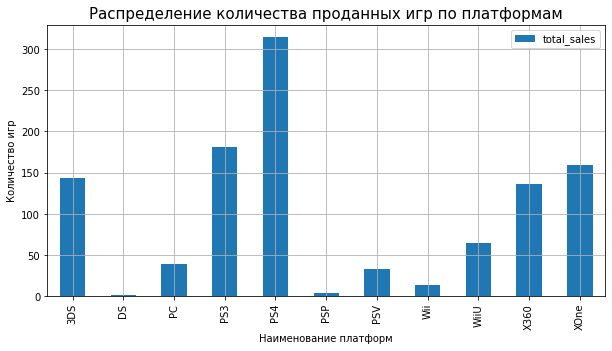

In [ ]:
best_platform.plot(kind='bar', grid='True', figsize=(10,5))
plt.title('Распределение количества проданных игр по платформам', fontsize=15)
plt.xlabel('Наименование платформ', fontsize=10)
plt.ylabel('Количество игр', fontsize=10)
# строим столбчатую диаграмму

**Вывод**

Лидируют на рынке 5 платформ: PS4, PS3, XOne, 3DS, X360. Общие продажи составляют порядка 1 миллиарда копий. Продажи растут, так как выходят новые поколения приставок.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

(0.0, 35.0)

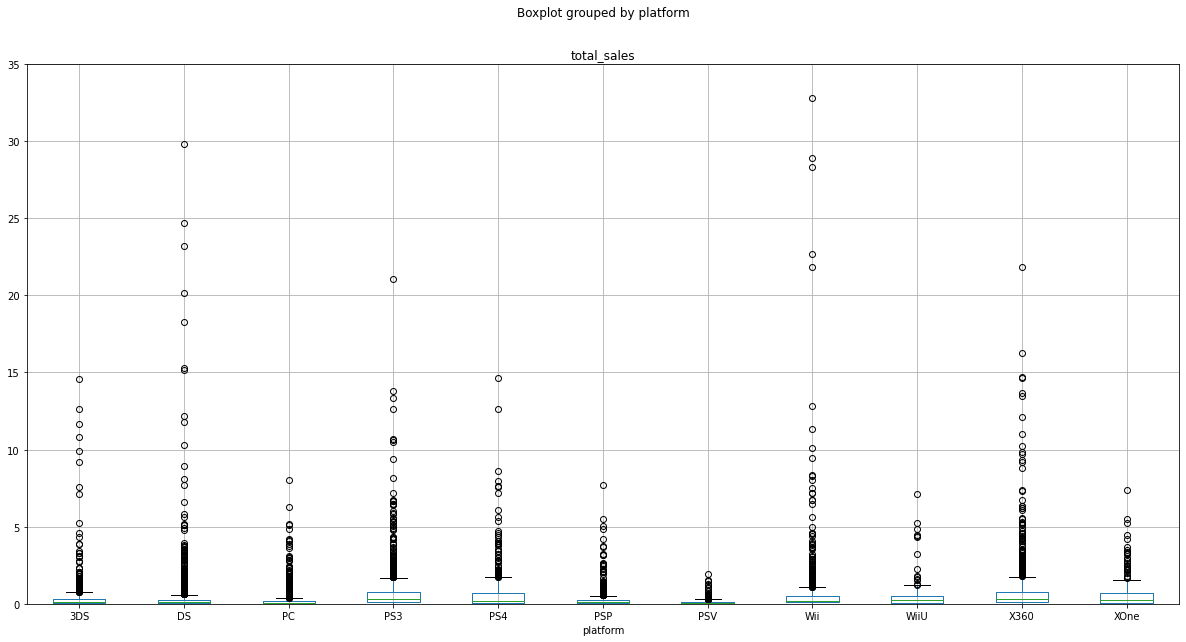

In [ ]:
ax1 = (games
    .query('platform in @best_platform.index')
    .boxplot('total_sales', by='platform', figsize=(20, 10))
)
ax1.set_ylim(0,35)
# общая картина

(0.0, 2.0)

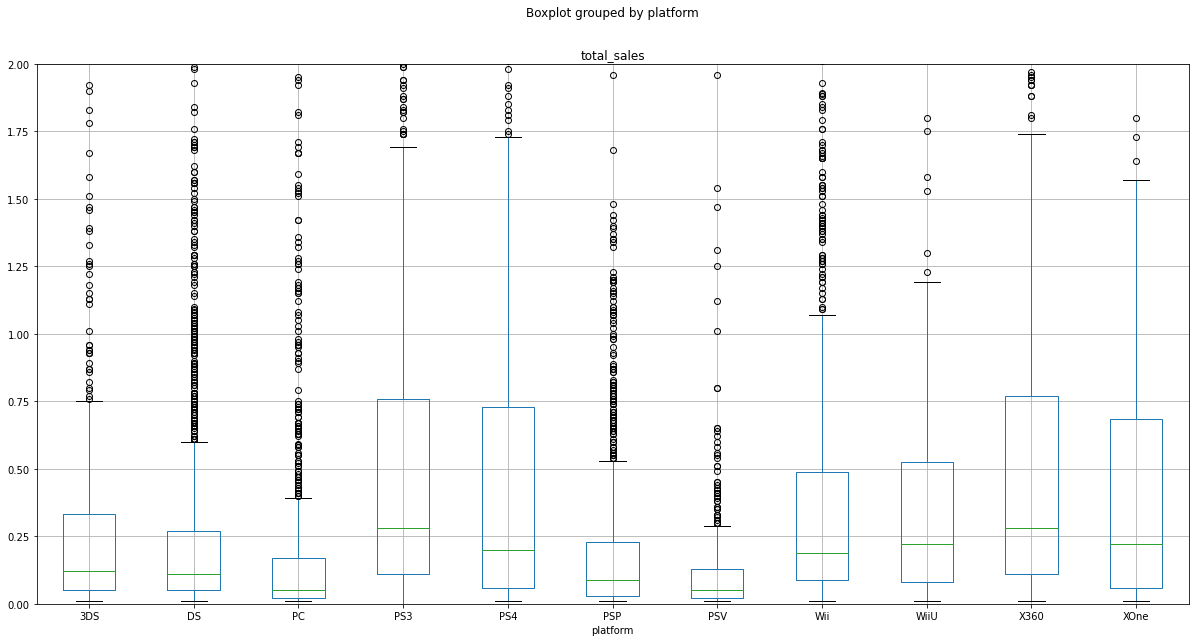

In [ ]:
ax = (games
    .query('platform in @best_platform.index')
    .boxplot('total_sales', by='platform', figsize=(20, 10))
)
ax.set_ylim(0, 2)
# более детально

**Вывод**

Можно заметить, что у платформ, которые входят в топ-5 (PS4, PS3, XOne, 3DS, X360), большая часть значений больше медианного. Разница в продажах отличается, так как есть индивидуальные топовые игры на конкретные платформы. 

In [ ]:
best_platform_median = actual_data_games.pivot_table(index=['platform'], values='total_sales', aggfunc='median')
best_platform_median.sort_values('total_sales', ascending=False)
# медианные значения для каждой платформы

,total_sales
platform,
X360,0.265
XOne,0.220
PS4,0.200
WiiU,0.200
Wii,0.180
DS,0.150
PS3,0.150
3DS,0.090
PC,0.080


### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для исследования возьмем платформу PS4

In [ ]:
ps4_rating = actual_data_games.query('platform == "PS4"')
# сделаем срез платформы из актуальной таблицы

In [ ]:
ps4_rating_sales = ps4_rating.loc[:, ['total_sales', 'critic_score', 'user_score']]
ps4_rating_sales.head(10)
# таблица с необходимой информацией

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7
94,7.60,85.0,5.0
105,7.17,87.0,6.5
143,6.08,82.0,5.7
154,5.64,76.0,6.1
171,5.39,93.0,7.9


In [ ]:
ps4_rating_sales.corr()
# считаем корреляцию

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

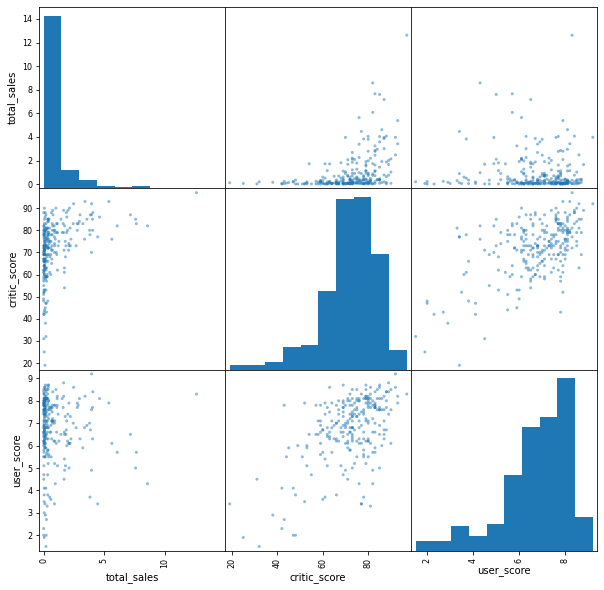

In [ ]:
pd.plotting.scatter_matrix(ps4_rating_sales, figsize=(10, 10))
# строим матрицу

**Вывод**

Для платформы PS4 очень важно оставаться на рынке среди лидирующих платформ. Они тщательно подходят к созданию игр. Поэтому есть прямая корреляция между продажами и оценкой критиков. Отрицательная корреляция не влияет на продажи, так как в основном все игроки смотрят на оценку критиков. Если критик оценил ее высоко, то с большей вероятностью игрок купит эту игру и оценит так же хорошо.

### Соотнесите выводы с продажами игр на других платформах.

Возьмем остальные платформы из топ-5

In [ ]:
ps3_rating = actual_data_games.query('platform == "PS3"')
# сделаем срез платформы из актуальной таблицы

In [ ]:
ps3_rating_sales = ps3_rating.loc[:, ['total_sales', 'critic_score', 'user_score']]
ps3_rating_sales.head(10)
# таблица с необходимой информацией

,total_sales,critic_score,user_score
16,21.05,97.0,8.2
69,9.36,71.0,2.6
126,6.46,86.0,4.3
149,5.86,95.0,9.1
180,5.27,NaN,NaN
255,4.36,NaN,4.8
264,4.28,NaN,4.5
337,3.71,88.0,8.1
378,3.49,80.0,5.8
421,3.23,81.0,7.7


In [ ]:
ps3_rating_sales.corr()
# считаем корреляцию

,total_sales,critic_score,user_score
total_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

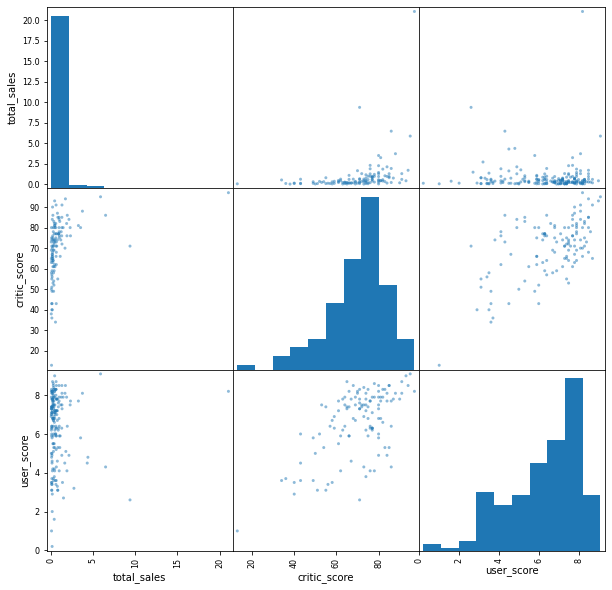

In [ ]:
pd.plotting.scatter_matrix(ps3_rating_sales, figsize=(10, 10))
# строим матрицу

In [ ]:
X360_rating = actual_data_games.query('platform == "X360"')
# сделаем срез платформы из актуальной таблицы

In [ ]:
X360_rating_sales = X360_rating.loc[:, ['total_sales', 'critic_score', 'user_score']]
X360_rating_sales.head(10)
# таблица с необходимой информацией

,total_sales,critic_score,user_score
23,16.27,97.0,8.1
60,10.24,73.0,2.6
72,9.18,NaN,NaN
263,4.28,NaN,4.9
271,4.22,84.0,4.2
380,3.49,79.0,5.6
410,3.31,86.0,7.9
494,2.92,NaN,4.2
612,2.52,87.0,4.9
724,2.23,80.0,5.6


In [ ]:
X360_rating_sales.corr()
# считаем корреляцию

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

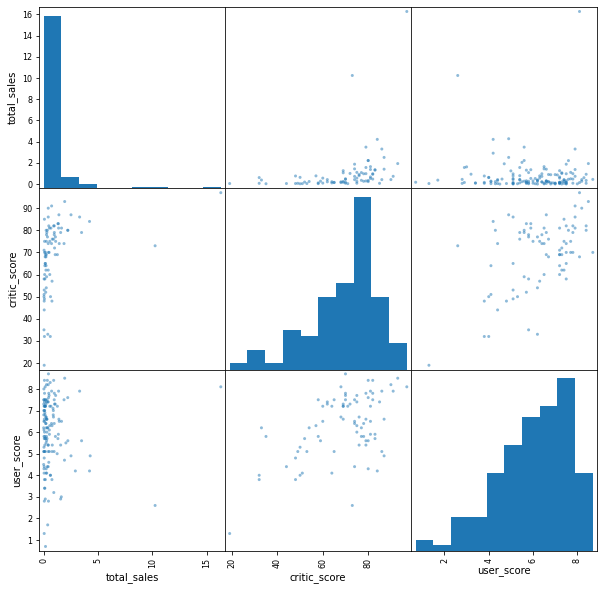

In [ ]:
pd.plotting.scatter_matrix(X360_rating_sales, figsize=(10, 10))
# строим матрицу

In [ ]:
XOne_rating = actual_data_games.query('platform == "XOne"')
# сделаем срез платформы из актуальной таблицы

In [ ]:
XOne_rating_sales = XOne_rating.loc[:, ['total_sales', 'critic_score', 'user_score']]
XOne_rating_sales.head(10)
# таблица с необходимой информацией

,total_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2
342,3.66,NaN,NaN
373,3.50,72.0,4.1
398,3.37,75.0,5.5
413,3.28,82.0,7.5
417,3.25,84.0,4.4


In [ ]:
XOne_rating_sales.corr()
# считаем корреляцию

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

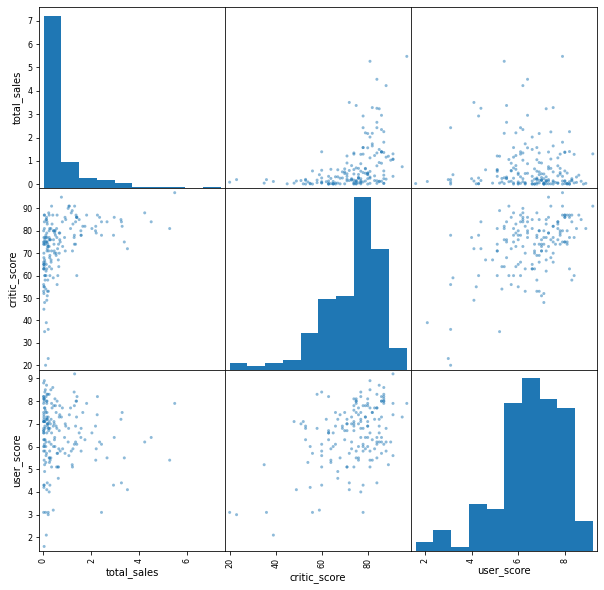

In [ ]:
pd.plotting.scatter_matrix(XOne_rating_sales, figsize=(10, 10))
# строим матрицу

In [ ]:
rating_3DS = actual_data_games.query('platform == "3DS"')
# сделаем срез платформы из актуальной таблицы

In [ ]:
rating_3DS_sales = rating_3DS.loc[:, ['total_sales', 'critic_score', 'user_score']]
rating_3DS_sales.head(10)
# таблица с необходимой информацией

,total_sales,critic_score,user_score
33,14.60,NaN,NaN
47,11.68,NaN,NaN
96,7.55,NaN,NaN
108,7.14,NaN,NaN
184,5.22,NaN,NaN
235,4.59,86.0,8.4
312,3.89,86.0,8.7
385,3.44,NaN,NaN
406,3.32,NaN,NaN
412,3.28,NaN,NaN


In [ ]:
rating_3DS_sales.corr()
# считаем корреляцию

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

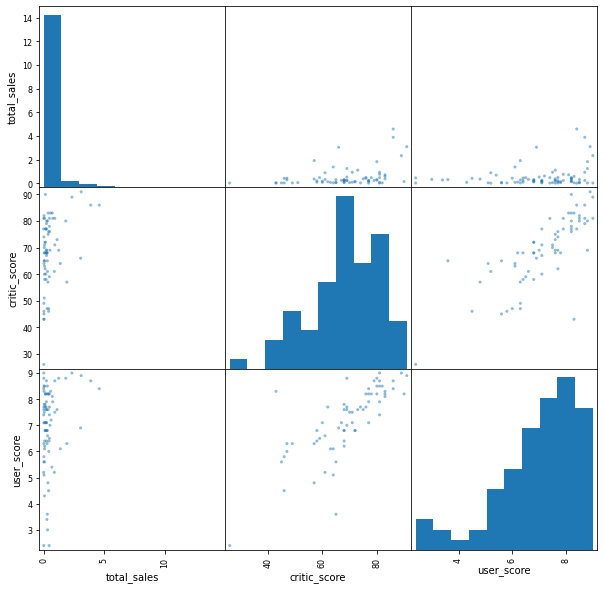

In [ ]:
pd.plotting.scatter_matrix(rating_3DS_sales, figsize=(10, 10))
# строим матрицу

**Вывод**

У платформ PS3, XOne, X360 ситуация похожа с ситуацией у платформы PS4, прямая зависимость продаж от оценки критиков. Не удивительно, ведь это конкурирующие между собой платформы.

Что касается платформы 3DS, здесь мы видим, что продажи так же зависят и от рейтингов игроков, хоть и не намного. Возможно это связано с меньшим количеством игр на данной платформе.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [ ]:
genre_pivot = actual_data_games.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
genre_pivot.columns = ['sum', 'count']
genre_pivot.sort_values('sum', ascending=False)
# сводная таблица по жанрам

,sum,count
genre,,
Action,321.87,766
Shooter,232.98,187
Sports,150.65,214
Role-Playing,145.89,292
Misc,62.82,155
Platform,42.63,74
Racing,39.89,85
Fighting,35.31,80
Adventure,23.64,245


**Вывод**

Самымы популярными жанрами являются Action, Shooter, Sports, Role-Playing.

Преположу, что экш лидирует из-за того, что в этом жанре есть прохождение "компании", обычно это очень интресно и затягивает много игроков.

Что касается шутеров, в них можно играть как одному, так и по сети, то есть с несколькоми игроками сразу. Яркий пример Counter-Strike, мировая игра до сих пор.

Спорт так же никогда не потеряет свою популярность. Например FIFA выходит каждый год, игроки покупают новые версии ради многочисленных переходов их любимых игроков в другие клубы.

Ролевые-игры(Role-Playing) - пришлось "загуглить" и узнать, что оказывается WOW считается ролевой-игрой. Люди по всему миру играют в эту игру начиная с 2004 года.

Что касается жанров с низкими продажами, тут игры на любителя, они не пользуются спросом.

### Вывод:

В исследовательском анализе проделали работу и выяснили:

- Больше всего игр было выпущено с 2005 по 2011 года
- Для популярных платформ срок использования равен 8-12 лет
- Определили топ-5 платформ по продажам игр : PS4, PS3, XOne, 3DS, X360
- Выяснили, что продажи зависят от оценки критиков
- Самыми популярными жанрами являются Action, Shooter, Sports, Role-Playing

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [ ]:
portret_platform_pivot_na = actual_data_games.pivot_table(index='platform',values='na_sales', 
                                              aggfunc='sum').sort_values('na_sales', ascending=False)
portret_platform_pivot_na
# сводная таблица для америки

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [ ]:
portret_platform_pivot_eu = actual_data_games.pivot_table(index='platform',values='eu_sales', 
                                              aggfunc='sum').sort_values('eu_sales', ascending=False)
portret_platform_pivot_eu
# сводная таблица для европы

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


In [ ]:
portret_platform_pivot_jp = actual_data_games.pivot_table(index='platform',values='jp_sales', 
                                              aggfunc='sum').sort_values('jp_sales', ascending=False)
portret_platform_pivot_jp
# сводная таблица для японии

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


In [ ]:
portret_platform_pivot_other = actual_data_games.pivot_table(index='platform',values='other_sales', 
                                              aggfunc='sum').sort_values('other_sales', ascending=False)
portret_platform_pivot_other
# сводная таблица для остального мира

,other_sales
platform,
PS4,48.35
PS3,26.77
XOne,14.27
X360,12.11
3DS,6.28
WiiU,4.69
PSV,3.26
PC,2.96
Wii,1.12


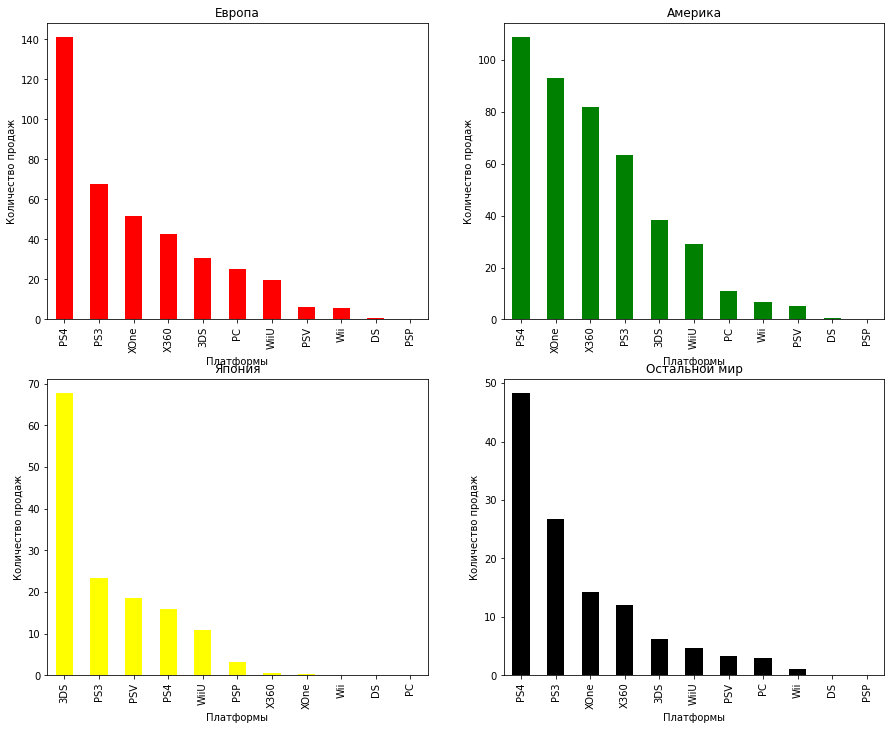

In [ ]:
fig, axis = plt.subplots(2,2, figsize=(15,12))

portret_platform_pivot_eu['eu_sales'].plot.bar(ax=axis[0,0],
                            color='red').set(xlabel='Платформы',ylabel='Количество продаж', title='Европа');
portret_platform_pivot_na['na_sales'].plot.bar(ax=axis[0,1],
                            color='green').set(xlabel='Платформы',ylabel='Количество продаж', title='Америка');
portret_platform_pivot_jp['jp_sales'].plot.bar(ax=axis[1,0],
                            color='yellow').set(xlabel='Платформы',ylabel='Количество продаж', title='Япония');
portret_platform_pivot_other['other_sales'].plot.bar(ax=axis[1,1],
                            color='black').set(xlabel='Платформы',ylabel='Количество продаж', title='Остальной мир');
# Графики для каждого региона

**Вывод**

Самые популярные платформы (топ-5):

1. Европа: PS4, PS3, XOne, X360, 3DS
2. Америка: PS4, XOne, X360, PS3, 3DS 
3. Япония: 3DS, PS3, PSV, PS4, WiiU  
4. Остальной мир: PS4, PS3, XOne, X360, 3DS

### Самые популярные жанры (топ-5)

In [ ]:
portret_genre_pivot_na = actual_data_games.pivot_table(index='genre',values='na_sales', 
                                              aggfunc='sum').sort_values('na_sales', ascending=False)
portret_genre_pivot_na
# сводная таблица для америки

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [ ]:
portret_genre_pivot_eu = actual_data_games.pivot_table(index='genre',values='eu_sales', 
                                              aggfunc='sum').sort_values('eu_sales', ascending=False)
portret_genre_pivot_eu
# сводная таблица для европы

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [ ]:
portret_genre_pivot_jp = actual_data_games.pivot_table(index='genre',values='jp_sales', 
                                              aggfunc='sum').sort_values('jp_sales', ascending=False)
portret_genre_pivot_jp
# сводная таблица для японии

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


In [ ]:
portret_genre_pivot_other = actual_data_games.pivot_table(index='genre',values='other_sales', 
                                              aggfunc='sum').sort_values('other_sales', ascending=False)
portret_genre_pivot_other
# сводная таблица для остального мира

,other_sales
genre,
Action,37.20
Shooter,28.77
Sports,19.45
Role-Playing,11.48
Misc,6.09
Racing,4.44
Platform,4.12
Fighting,3.56
Adventure,2.43


**Вывод**

Самые популярные жанры (топ-5):

1. Европа: Action, Shooter, Sports, Role-Playing, Racing
2. Америка: Action, Shooter, Sports, Role-Playing, Mics 
3. Япония: Role-Playing, Action, Mics, Fighting, Shooter
4. Остальной мир: Action, Shooter, Sports, Role-Playing, Mics

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
portret_rating_pivot_na = actual_data_games.pivot_table(index='rating',values='na_sales', 
                                              aggfunc='sum').sort_values('na_sales', ascending=False)
portret_rating_pivot_na
# сводная таблица для америки

,na_sales
rating,
M,165.21
RP,89.42
E,79.05
E10+,54.24
T,49.79


In [ ]:
portret_rating_pivot_eu = actual_data_games.pivot_table(index='rating',values='eu_sales', 
                                              aggfunc='sum').sort_values('eu_sales', ascending=False)
portret_rating_pivot_eu
# сводная таблица для европы

,eu_sales
rating,
M,145.32
E,83.36
RP,78.91
E10+,42.69
T,41.95


In [ ]:
portret_rating_pivot_jp = actual_data_games.pivot_table(index='rating',values='jp_sales', 
                                              aggfunc='sum').sort_values('jp_sales', ascending=False)
portret_rating_pivot_jp
# сводная таблица для японии

,jp_sales
rating,
RP,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


In [ ]:
portret_rating_pivot_other = actual_data_games.pivot_table(index='rating',values='other_sales', 
                                              aggfunc='sum').sort_values('other_sales', ascending=False)
portret_rating_pivot_other
# сводная таблица для остального мира

,other_sales
rating,
M,47.04
RP,23.46
E,22.61
T,14.29
E10+,12.57


**Вывод**

Для начала о аббревиатуре рейтингов:
- M : Для взрослых
- T : Подросткам
- E : Для всех
- E10+ : Для всех от 10 лет и старше
- RP : Рейтинг ожидается

Теперь касательно регионов, рейтинг возраста влияет на продажи в Европе и Америке, там ориентированы игры для взрослых, так же как и в остальном мире. У Японии большинство игр без возрастного рейтинга, а на втором месте тгры для подростков. Наверно это связано с лидирующей там платформой, на Nintendo очень мало игр для взрослых. 

### Вывод

После изучения данных по регионам можно составить портер игрока:

- Америка: возраст 17+; платформы PS4, XOne; жанры Action, Shooter
- Европа: возраст 17+; платформы PS4, PS3; жанры Action, Sports
- Япония: возраст 13+; платформы 3DS, PS3; жанры Role-Playing, Action

## Проверьте гипотезы

Для проверки гипотез будем использовать t-критерий Стьюдента

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

Пороговое значение alpha примем за 5%

In [ ]:
xone_test = actual_data_games[(actual_data_games['platform'] == 'XOne') & (actual_data_games['user_score'] > 0)]['user_score']
pc_test = actual_data_games[(actual_data_games['platform'] == 'PC') & (actual_data_games['user_score'] > 0)]['user_score']
# подготовим данные для проверки гипотез

In [ ]:
alpha = 0.05

result = st.ttest_ind(xone_test, pc_test)

print('р-значение: ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Рейтинги в целом похожи друг на друга, что и подтверждает нулевая гипотеза.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевую и альтернативную гипотезы:

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1: Средние пользовательские рейтинги жанров Action и Sports отличаются

Пороговое значение alpha примем за 5%

In [ ]:
action_test = actual_data_games[(actual_data_games['genre'] == 'Action') & (actual_data_games['user_score'] > 0)]['user_score']
sports_test = actual_data_games[(actual_data_games['genre'] == 'Sports') & (actual_data_games['user_score'] > 0)]['user_score']
# подготовим данные для проверки гипотез

In [ ]:
alpha = 0.05

result = st.ttest_ind(action_test, sports_test)

print('р-значение: ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу


**Вывод**

Тест Стьюдента подтвердил о различиях между жанрами экшн и спорт

### Вывод

С помощью теста Стьюдента мы подтвердили обе гипотезы

## Вывод

В ходе проделанной работы было выполнено следующее:

1. Изучение общей информации о датафрейме


2. Предобработка данных, название столбцов было приведено к нижнему регистру, восстановлены пропуски в строках, удалены строки без нужных данных. добавлен столбец суммарных продаж.


3. Исследовательский анализ данных. Выяснили, что больше всего игр было выпущено с 2005 по 2011 года, для популярных платформ срок использования равен 8-12 лет, определили топ-5 платформ по продажам игр : PS4, PS3, XOne, 3DS, X360, выяснили, что продажи зависят от оценки критиков, самымы популярными жанрами являются Action, Shooter, Sports, Role-Playing. Составили портрет пользователя для каждого региона.


4. Проверили и подтвердили гипотезы

Отвечая на главный вопрос проекта, можно дать рекомендации для рекламных компаний на 2017 и последующие года:

- Делать ставку на современные платформы, такие как PS4, XOne и 3DS.
- Продовать и выпускать качественные игры в популярных жанрах - экшен, шутеры, спортивные и ролевые игры.
- Пытаться создать качественный продукт, ведь оценка критиков влияет на продажи.
- Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.
- Не забывать выпускать игры на PC. Компьютер еще долго не выйдет из конкуренции для геймеров. Поэтому популярные платформы могут на этом заработать еще больше.
